In [5]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import glob

In [2]:
ages_seleccionadas = gpd.read_file("geodata.gpkg")
ages_seleccionadas = ages_seleccionadas.to_crs("EPSG:4326")
ages_seleccionadas = ages_seleccionadas[["CVEGEO", "CVE_ENT", "CVE_MUN", "CVE_LOC", "CVE_AGEB","POB_TOTAL", "metrica", "geometry"]]
ages_seleccionadas = gpd.GeoDataFrame(ages_seleccionadas, geometry=ages_seleccionadas.geometry)
ages_seleccionadas.head()

,CVEGEO,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,POB_TOTAL,metrica,geometry
0,060020001127A,06,002,0001,127A,1258,0.551410,"POLYGON ((-103.73577 19.24392, -103.73577 19.2..."
1,0600200010731,06,002,0001,0731,2350,0.541942,"POLYGON ((-103.73430 19.24640, -103.73432 19.2..."
2,0600200011513,06,002,0001,1513,708,0.539966,"POLYGON ((-103.73608 19.24041, -103.73623 19.2..."
3,0600200010746,06,002,0001,0746,942,0.504686,"POLYGON ((-103.72441 19.23889, -103.72539 19.2..."
4,0600200011176,06,002,0001,1176,2717,0.499525,"POLYGON ((-103.74281 19.24436, -103.74298 19.2..."


# Calcula de la muestra representativa

## Definir el nivel de confianza
**Definir el nivel de confianza:** El nivel de confianza se refiere a la probabilidad de que los resultados obtenidos en la muestra sean representativos de la población en su conjunto. Es común utilizar un nivel de confianza del 95%, lo que implica que hay un 95% de probabilidad de que los resultados estén dentro del margen de error establecido.

In [3]:
n_confianza = 0.95

## Definir el margen de error
**Determinar el margen de error:** El margen de error es la cantidad de variabilidad que se está dispuesto a aceptar en los resultados. Un margen de error más pequeño requiere una muestra más grande y viceversa.

In [4]:
m_error = 0.05

## Estimar la variabilidad de los datos
**Estimar la variabilidad de los datos:** Para calcular el tamaño de muestra necesario, es importante tener una idea de la variabilidad de los datos en la población. Si la variabilidad es alta, se requerirá una muestra más grande para obtener resultados confiables.

## Calcular el tamaño de la muestra
**Calcular el tamaño de muestra:** Una vez que tienes estos valores (nivel de confianza, margen de error y estimación de la variabilidad), puedes utilizar fórmulas estadísticas específicas para calcular el tamaño de muestra necesario. La fórmula más comúnmente utilizada es la fórmula para el tamaño de muestra en una población finita:

$$n = \frac{Z^2*p*(1-p)}{E^2}$$

Donde:
* **n** es el tamaño de muestra necesario.
* **Z** es el valor crítico z-score correspondiente al nivel de confianza deseado (por ejemplo, 1.96 para un nivel de confianza del 95%).
* **p** es la estimación de la proporción de la población que exhibe la característica de interés.
* **E** es el margen de error deseado.


### Población por ageb

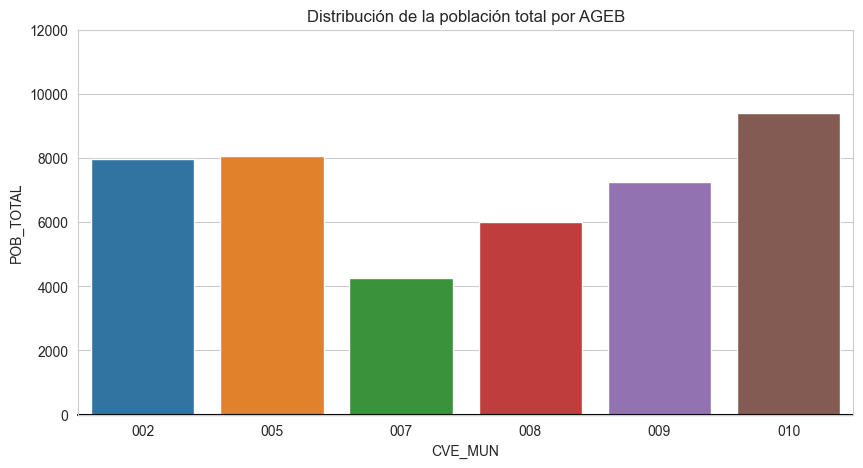

In [20]:
fig, ax = plt.subplots(figsize=(10, 5))


#sns.despine(ax=ax, left=True)
df = ages_seleccionadas.groupby('CVE_MUN')['POB_TOTAL'].sum().reset_index()

sns.barplot(x='CVE_MUN', y='POB_TOTAL', data=df, ax=ax)

ax.set_ylabel('POB_TOTAL')

ax.set_xlabel('CVE_MUN')

ax.set_title('Distribución de la población total por AGEB')

ax.set_ylim(0, 12000)

# horizontal lines
ax.axhline(0, color="k", clip_on=False) 

plt.show()

### Calculo de Z 

In [21]:
ages_seleccionadas[]

,CVEGEO,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,POB_TOTAL,metrica,geometry
0,060020001127A,06,002,0001,127A,1258,0.551410,"POLYGON ((-103.73577 19.24392, -103.73577 19.2..."
1,0600200010731,06,002,0001,0731,2350,0.541942,"POLYGON ((-103.73430 19.24640, -103.73432 19.2..."
2,0600200011513,06,002,0001,1513,708,0.539966,"POLYGON ((-103.73608 19.24041, -103.73623 19.2..."
3,0600200010746,06,002,0001,0746,942,0.504686,"POLYGON ((-103.72441 19.23889, -103.72539 19.2..."
4,0600200011176,06,002,0001,1176,2717,0.499525,"POLYGON ((-103.74281 19.24436, -103.74298 19.2..."
5,0600500180131,06,005,0018,0131,1461,0.520908,"POLYGON ((-103.57992 19.39660, -103.57959 19.3..."
6,060050018017A,06,005,0018,017A,764,0.491477,"POLYGON ((-103.58012 19.38908, -103.57936 19.3..."
7,0600500010235,06,005,0001,0235,1746,0.461234,"POLYGON ((-103.59482 19.32612, -103.59459 19.3..."
8,0600500010112,06,005,0001,0112,2186,0.431079,"POLYGON ((-103.59692 19.33463, -103.59684 19.3..."
9,0600500010108,06,005,0001,0108,1905,0.407023,"POLYGON ((-103.60291 19.33246, -103.60277 19.3..."
